<a href="https://colab.research.google.com/github/KhalylDammas/MyProjects/blob/main/Arabic_MNIST_Classification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class MyDataset(Dataset):
    def __init__(self, train=True):
        super().__init__()
        self.train = train
        if self.train:
            self.data = pd.read_csv("csvTrainImages 13440x1024.csv")
            self.lb = pd.read_csv("csvTrainLabel 13440x1.csv")
            
        else:
            self.data = pd.read_csv("csvTestImages 3360x1024.csv")
            self.lb = pd.read_csv("csvTestLabel 3360x1.csv")

    def __len__(self):
        self.im = self.data.to_numpy().reshape(-1, 1, 32, 32)
        return self.im.shape[0]
    
    def __getitem__(self, idx):
        self.image = self.data.to_numpy().reshape(-1, 1, 32, 32)
        self.label = self.lb.to_numpy().reshape(-1)-1
        return (self.image[idx, :, :, :], self.label[idx])

In [ ]:
train_dataset = MyDataset(train=True)
test_dataset = MyDataset(train=False)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [ ]:
tl = iter(train_loader)
batch_ = next(tl)

In [ ]:
np.array(batch_[1]).shape
# plt.figure(figsize=(15, 15))
# for i in range(20):
#     plt.subplot(4, 5, i+1)
#     plt.imshow(batch_[0][i, 0, :, :], cmap='gray')
#     plt.title(batch_[1][i].item())
# plt.show()

(64,)

In [ ]:
device = torch.device("cuda")

In [ ]:
net = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1).to(device)

In [ ]:
for params in net.parameters():
    params.requires_grad=False

In [ ]:
net.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
net.fc = nn.Linear(in_features=2048, out_features=28, bias=True)

In [ ]:
start = time.time()
net = net.to(device)
num_epochs = 200

lr = 0.05

opt = optim.Adam(params=net.parameters(), lr=lr)
sch = optim.lr_scheduler.ExponentialLR(optimizer=opt, gamma=0.9)

ls = []

for i in range(num_epochs):
    total_loss = 0
    e_start = time.time()
    for batch in train_loader:
        X, y = batch[0].type(torch.FloatTensor).to(device), batch[1].to(device)
        logits = net(X)
        loss = F.cross_entropy(logits, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total_loss+=loss.item()
    sch.step()
    ls.append(total_loss)
    if ((i+1)%20 == 0) or (i == 0):
        print(f"For Epoch: {i+1}/{num_epochs}:\nLoss = {ls[i]}\nTime = {(time.time() - e_start):.2f} seconds\t{num_epochs-i} Epochs To go...")
        print("-"*50)
print("_"*50)
print(f"\nTraining Done in {((time.time() - start)/60):.2f} Minutes\n")
print("_"*50)

For Epoch: 1/200:
Loss = 3640.688428878784
Time = 23.63 seconds	200 Epochs To go...
--------------------------------------------------
For Epoch: 20/200:
Loss = 845.0070799589157
Time = 23.15 seconds	181 Epochs To go...
--------------------------------------------------
For Epoch: 40/200:
Loss = 479.833391726017
Time = 25.02 seconds	161 Epochs To go...
--------------------------------------------------
For Epoch: 60/200:
Loss = 431.8102347254753
Time = 23.54 seconds	141 Epochs To go...
--------------------------------------------------
For Epoch: 80/200:
Loss = 427.4597113132477
Time = 22.91 seconds	121 Epochs To go...
--------------------------------------------------
For Epoch: 100/200:
Loss = 432.0272481441498
Time = 22.84 seconds	101 Epochs To go...
--------------------------------------------------
For Epoch: 120/200:
Loss = 434.72615015506744
Time = 22.97 seconds	81 Epochs To go...
--------------------------------------------------
For Epoch: 140/200:
Loss = 432.4885279536247
Tim

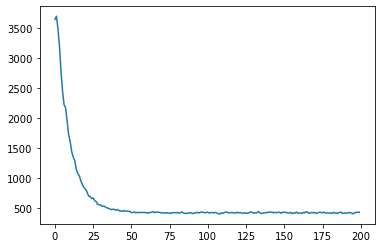

In [ ]:
plt.plot(ls);

In [ ]:
for params in net.parameters():
    params.requires_grad=True

In [ ]:
start = time.time()
num_epochs = 200

lr = 1e-3

opt = optim.Adam(params=net.parameters(), lr=lr)
sch = optim.lr_scheduler.ExponentialLR(optimizer=opt, gamma=0.9)

ls = []

for i in range(num_epochs):
    total_loss = 0
    e_start = time.time()
    for batch in train_loader:
        X, y = batch[0].type(torch.FloatTensor).to(device), batch[1].to(device)
        logits = net(X)
        loss = F.cross_entropy(logits, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total_loss+=loss.item()
    sch.step()
    ls.append(total_loss)
    if ((i+1)%20 == 0):
        print(f"For Epoch: {i+1}/{num_epochs}:\nLoss = {ls[i]}\nTime = {(time.time() - e_start):.2f} seconds\t{num_epochs-i} To go...")
print("_"*50)
print(f"\nTraining Done in {((time.time() - start)/60):.2f} Minutes\n")
print("_"*50)

For Epoch: 20/200:
Loss = 174.20111295580864
Time = 41.55 seconds	181 To go...
For Epoch: 40/200:
Loss = 16.423697567544878
Time = 41.76 seconds	161 To go...
For Epoch: 60/200:
Loss = 5.661909096059389
Time = 41.64 seconds	141 To go...
For Epoch: 80/200:
Loss = 4.643654173996765
Time = 41.70 seconds	121 To go...
For Epoch: 100/200:
Loss = 4.238945743534714
Time = 41.61 seconds	101 To go...
For Epoch: 120/200:
Loss = 4.740964791504666
Time = 41.56 seconds	81 To go...
For Epoch: 140/200:
Loss = 4.101469878805801
Time = 41.39 seconds	61 To go...
For Epoch: 160/200:
Loss = 4.546560283284634
Time = 41.46 seconds	41 To go...
For Epoch: 180/200:
Loss = 4.993494214955717
Time = 41.28 seconds	21 To go...
For Epoch: 200/200:
Loss = 3.9393427157774568
Time = 41.67 seconds	1 To go...
__________________________________________________

Training Done in 139.04 Minutes

__________________________________________________


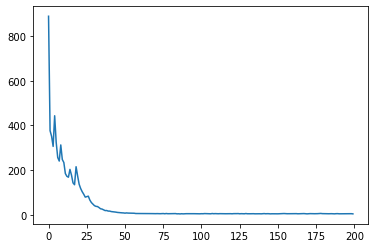

In [ ]:
plt.plot(ls);

In [ ]:
@torch.no_grad()
def test_accuracy(net, test_loader):
  average_acc = 0
  for batch in test_loader:
    X, y = batch[0].type(torch.FloatTensor).to(device),  batch[1].to(device)
    logits = net(X)
    labels = torch.argmax(logits, axis = 1)
    acc = torch.sum(labels == y, axis =0)/y.shape[0]
    average_acc+=acc

  print(average_acc/ len(test_loader))

test_accuracy(net, test_loader)

tensor(0.8460, device='cuda:0')
